# Background
On April 6 2022, the Center for Countering Digital Hate, a US-headquartered international non-profit that disrupts the architecture of online hate and misinformation, released a [report](https://counterhate.com/research/hidden-hate/) detailing the harassment, violent threats, image-based sexual abuse that strangers send to high-profile women via Instagram direct messages (DM). 

This misogyny is worse than you think - after analysing more than 8,700 messages from five high-profile women on Instagram, it found that Instagram failed to act on 90% of abuse sent via DM to the women in the study.

Misogyny, for the uninitiated, is the hatred of, contempt for, or prejudice against women. It may surprise some to know that misogyny is well and alive today, even as we pride ourselves as the civilised generation which has reached the pinnacles of gender equality. Misogyny is not a hate crime in most jurisdictions, and therefore it is usually not punishable by law. Yet, according to the report, online misogyny has "offline impacts in normalising gender-based violence and harassment". 

In the absence of effective tools to stop the stream of harmful content, women have been forced to find their own solutions, often tailoring their content to avoid provoking abusers or avoiding posting altogether to reduce their visibility. 

Why should women be expected to tailor their content so that they don't 'provoke' the misogynists? Surely there's an easier way to block the misogynists..?

# Research Question

Now I'm not a "high-profile woman", but I sympathise with the women that are, and who receive underserved misogynist remarks by strangers. As a social researcher with a keen interest in machine learning methods, my research question is unsurprisingly: how do we train models to identify misogynist DMs, so that these DMs can be filtered and will never reach the eyes of the women they're meant to insult?

# Finding a Dataset

The [dataset](https://data.mendeley.com/datasets/3jfwsdkryy/3) we'll be using to answer the research question is prepared by Theo Lynn et al. It comprises 2285 definitions posted on the Urban Dictionary platform from 1999 to 2016. The definitions were then classified as misogynistic and non-misogynistic by three independent researchers with domain knowledge. It contains two columns: the text-based definition from Urban Dictionary and its respective classification (1 for misogynistic and 0 for non-misogynistic).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
from wordcloud import STOPWORDS 

In [2]:
df = pd.read_csv("ManualTag_Misogyny.csv", encoding= "latin-1")
df

,Definition,is_misogyny
0,Ur gonna die... queer,0.0
1,Valuptuous man boobs.,0.0
2,Variation of brother.,0.0
3,Very impressive penis,0.0
4,What I call my penis.,0.0
...,...,...
2281,"A women who is ""easy""",1.0
2282,Any hot/ sexy chicks.,1.0
2283,Any vaginal secretion,1.0
2284,Person who slaps hoes,1.0


## Finding the total number of rows with empty values

In [3]:
df.isnull().sum()

Definition     0
is_misogyny    1
dtype: int64

## Identifying where the missing row is

In [4]:
df[df['is_misogyny'].isnull()].index

Int64Index([1251], dtype='int64')

## Reading the definition of the row containing the missing 'is_misogyny' value

In [5]:
df[df['is_misogyny'].isnull()]['Definition']

1251    When someone makes a post on Facebook and you ...
Name: Definition, dtype: object

## Replace NaN with the appropriate label
Since the definition does not seem misogynistic, I will replace it with a 0.

In [6]:
df = df.fillna(0)

### Checking if my replacement is successful

In [7]:
df.isnull().sum()

Definition     0
is_misogyny    0
dtype: int64

### Counting the values for 'is_misogyny' column

In [8]:
df['is_misogyny'].value_counts()

0.0    1252
1.0    1034
Name: is_misogyny, dtype: int64

# Data Cleaning
I did some simple cleaning up on the column 'Definition' - things like removing punctuation, lowering the cases, and removing stopwords (I used the STOPWORDS module from wordcloud). Stopwords are words that we use so often (e.g., I, my, you) that they don't usually add value to the analysis. Removing them before visualizing or training will really help improve the score!

In [9]:
df['cleaned_definition'] = df['Definition'].str.replace(r'[^\w\s]+', '')

/var/folders/t7/734g744s6ln1tck9xz2rl8880000gn/T/ipykernel_34786/3660200938.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cleaned_definition'] = df['Definition'].str.replace(r'[^\w\s]+', '')


In [10]:
df['cleaned_definition'] = df['cleaned_definition'].str.lower()

In [11]:
#Creating a new column to remove stopwords

df['cleaned_definition_nostop'] = df['cleaned_definition'].apply(lambda x: ' '.join([word for word in x.split() if word not in STOPWORDS]))


In [12]:
df

,Definition,is_misogyny,cleaned_definition,cleaned_definition_nostop
0,Ur gonna die... queer,0.0,ur gonna die queer,ur gonna die queer
1,Valuptuous man boobs.,0.0,valuptuous man boobs,valuptuous man boobs
2,Variation of brother.,0.0,variation of brother,variation brother
3,Very impressive penis,0.0,very impressive penis,impressive penis
4,What I call my penis.,0.0,what i call my penis,call penis
...,...,...,...,...
2281,"A women who is ""easy""",1.0,a women who is easy,women easy
2282,Any hot/ sexy chicks.,1.0,any hot sexy chicks,hot sexy chicks
2283,Any vaginal secretion,1.0,any vaginal secretion,vaginal secretion
2284,Person who slaps hoes,1.0,person who slaps hoes,person slaps hoes


# Data Visualization with Wordclouds

## Visualizing all definitions

In [13]:
#Wordclouds use strings, so we have to form a string with the values in the column 'cleaned_definition_nostop'. 

out = ' '.join(df['cleaned_definition_nostop'])

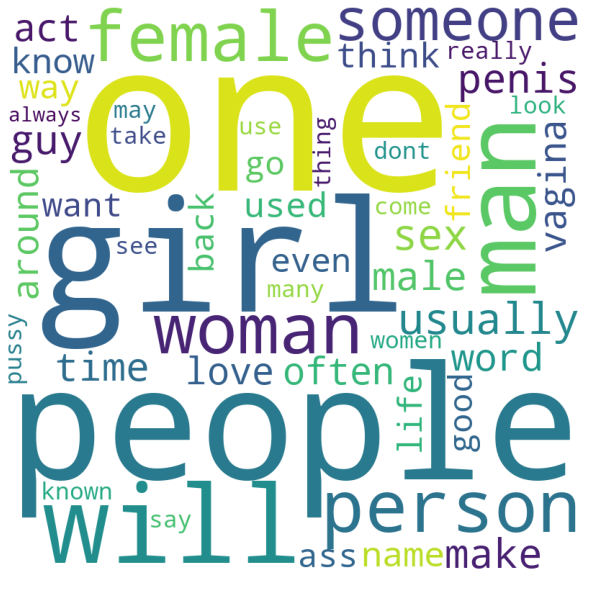

In [14]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10, max_words = 50).generate(out)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Visualizing only misogynistic definitions

In [15]:
miso_df = df.loc[df['is_misogyny'] == 1]

miso_df = miso_df[['cleaned_definition_nostop']]

miso_string = ' '.join(miso_df['cleaned_definition_nostop'])

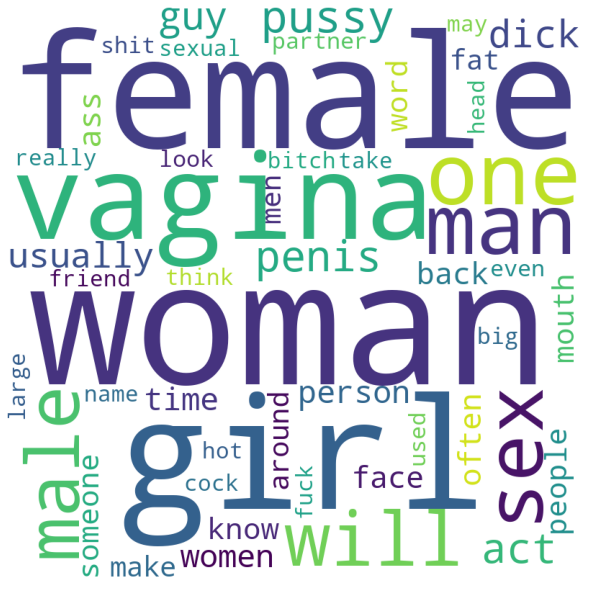

In [16]:
miso_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10, max_words = 50).generate(miso_string)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(miso_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Some thoughts about data visualizations

With the wordclouds, you can sort of see the most frequently occuring words in misogynistic comments. Unsurprisingly, misogynistic comments are usually sexual comments, which in my opinion, begets a deeper look into the underlying reasons for hatred against women. Are men usually the perpetrators of misogyny? What is the relationship between sex and misogyny..? 

# TFIDF Vectorization

Before training the model, it is important to transform the textual data into a vector. Machine learning algorithms do not understand language (the basic ones at least), but they do understand vectors. The term frequency-inverse document frequency (TFIDF) is a frequently-used vectorizer that transform textual data into a usable factor. 

Term frequency is the number of occurrences of a word in a document (i.e., how important a word is in a document), while document frequency is the number of documents containing a specific term (i.e., how common the word is). Inverse document frequency is the weight of a word, and aims to reduce the weight of a word if it appears frequently in the documents. Therefore, the higher the document frequency, the lower the inverse document frequency -- it is likely to be a stopword!

Of course, there are some limitations with the TDIDF vectorization -- you would be forgoing synonyms and semantics. But for this simple machine learning task, we're not working with long-form textual data like prose, so it'll suffice.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

/Users/rachyl/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
# Declaring my TfidVectorizer object
tfidf_vectorizer=TfidfVectorizer(use_idf=True)

# Performing a fit_transform method with the 'cleaned_definition_nostop' column values
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(df['cleaned_definition_nostop'])

# Checking if the output is a sparse matrix
tfidf_vectorizer_vectors

<2286x16289 sparse matrix of type '<class 'numpy.float64'>'
	with 53490 stored elements in Compressed Sparse Row format>

## Turning the sparse matrix into a DataFrame

The sparse matrix data type happens because we need to tokenize each word and set it up as columns. Since the resulting matrix can be potentially huge, the data object is created for loading efficiency.

In [19]:
# Obtaining column names for the dataframe

tfidf_vectorizer.get_feature_names()

['010',
 '02',
 '034',
 '04',
 '0702pm',
 '0708pm',
 '07rnrntheir',
 '095lbsrnbirthday',
 '0chan',
 '10',
 '100',
 '1000',
 '100000',
 '1000s',
 '100m',
 '100s',
 '101',
 '103',
 '10cup',
 '10th',
 '11',
 '110',
 '1100',
 '1120am',
 '1129am',
 '1134am',
 '1136am',
 '117',
 '12',
 '12rnthe',
 '12th',
 '13',
 '1337',
 '1338',
 '135',
 '1350',
 '137rnrnborn',
 '13th',
 '14',
 '15',
 '15000',
 '1500s',
 '151',
 '1516',
 '1530s',
 '155chinknn2',
 '1583',
 '1590nnmany',
 '16',
 '160',
 '168',
 '17',
 '1750',
 '179',
 '1790s',
 '18',
 '180',
 '1823',
 '18481933',
 '18nnin',
 '19',
 '1920s',
 '1934',
 '1939',
 '1940',
 '1940and',
 '1941',
 '1941spring',
 '1942',
 '1942winter',
 '1943',
 '1944',
 '1948',
 '1950s',
 '19582009',
 '1960',
 '1960s',
 '1961',
 '1964',
 '1968',
 '1970',
 '1970s',
 '1970srn5',
 '1971',
 '1971nnii',
 '1972',
 '1973',
 '1979',
 '1979rnrnafter',
 '1980s',
 '1982',
 '1983',
 '1984',
 '1985',
 '1987',
 '1988',
 '1988rnrntransitive',
 '1989',
 '1990s',
 '1991',
 '1992',
 '1

In [20]:
tfidf_df = pd.DataFrame(tfidf_vectorizer_vectors.toarray(), columns = tfidf_vectorizer.get_feature_names())
tfidf_df

,010,02,034,04,0702pm,0708pm,07rnrntheir,095lbsrnbirthday,0chan,10,...,ûïoh,ûïreal,ûïshoot,ûïshopping,ûïsight,ûïsuspicious,ûïthe,ûïtrippinûª,ûïworld,ûò
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Training

In [21]:
# Importing ML libraries

from sklearn.model_selection import train_test_split 
from sklearn.dummy import DummyClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import f1_score, confusion_matrix, plot_confusion_matrix

## Preparing independent and dependent variables

In [22]:
X = tfidf_df #indepdent variables
y = df['is_misogyny'] #dependent variables

## Splitting into test and train sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Training a Dummy Classifier Model

Before training an actual model, it is important to establish a baseline model that can be used to compare against other more complex classifiers.  

A Dummy Classifier does just that -- it is a classifier model that makes predictions without trying to find patterns in the data. 

Before going ahead with a Dummy Classifier model, I'm going to select the metric that I will be using to compare my models with. The popular metrics are precision and recall scores. 

Precision measures how precise the model is by seeing how many of the predicted positives are actual positives, and is useful when the costs of a False Positive is high -- email spam detection. On the other hand, recall calculates how many of the actual positives are captured by predicted positives. This is useful when the costs of a False Negative is high, such as, when testing for COVID-19. 

The f1 score is a function of the precision and recall scores, and is needed when we want to seek a balance between precision and recall -- which is apt for this case. 

F1 = 2 x (Precision * Recall) / (Precision + Recall)

To visualize True Positives, False Positives, True Negatives and False Negatives, the confusion matrix is one of the most easily interpretable charts out there - which is what I'll be plotting to visualize the performance of each model. 

In [24]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

print('F1 score =', round(f1_score(y_test, y_pred), 2))

F1 score = 0.39


/Users/rachyl/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


In [25]:
confusion_matrix(y_test, y_pred)

array([[144, 116],
       [122,  76]])

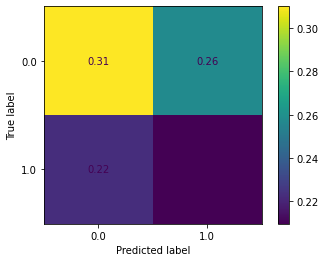

In [26]:
plot_confusion_matrix(dummy_clf, X_test, y_test, normalize='all')

## Training a Logistic Regression Model

In [27]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print('F1 score =', round(f1_score(y_test, y_pred_log), 2))

F1 score = 0.79


In [28]:
confusion_matrix(y_test, y_pred_log)

array([[255,   5],
       [ 65, 133]])

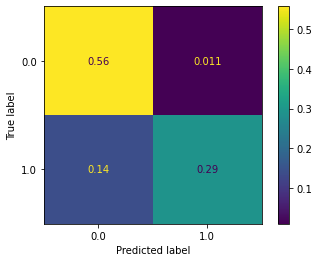

In [29]:
plot_confusion_matrix(log_model, X_test, y_test, normalize='all')

## Training a Decision Tree Classifier Model

In [30]:
dc_model = DecisionTreeClassifier()
dc_model.fit(X_train, y_train)
y_pred_dc = dc_model.predict(X_test)
print('F1 score =', round(f1_score(y_test, y_pred_dc), 2))

F1 score = 0.84


In [31]:
confusion_matrix(y_test, y_pred_dc)

array([[234,  26],
       [ 35, 163]])

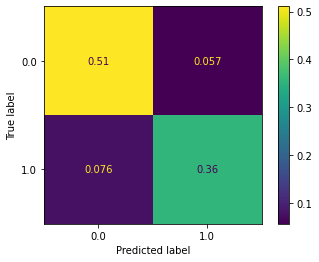

In [32]:
plot_confusion_matrix(dc_model, X_test, y_test, normalize='all')

## Training a Random Forest Classifier Model

In [33]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print('F1 score =', round(f1_score(y_test, y_pred_rf), 2))

F1 score = 0.85


In [34]:
confusion_matrix(y_test, y_pred_rf)

array([[252,   8],
       [ 46, 152]])

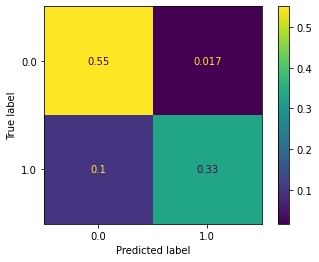

In [35]:
plot_confusion_matrix(rf_model, X_test, y_test, normalize='all')

The Random Forest Classifier model works much better than the Logistic Regression model, and only slightly better than the Decision Tree Classifier model. That's no surprise, given that decision trees are usually better than logistic regression models. 

I will go ahead with improving the Random Forest Classifier model, insofar as random forests are typically regarded as a stronger modeling technique, and avoids overfitting by using multiple trees. One downside is that random forests are hard to visualise, but in this particular case, it's not really necessary. 

# Feature Importance

Now that I've tried three models and have reached scores that are much higher than a Dummy Classifier Model, it is time to use Feature Importance to calculate a score for all the input features for a given model. The scores simply represent the “importance” of each feature. A higher score means that the specific feature has a larger effect on the model that is being used to predict a certain variable.

Understanding the importance of each feature is important in reducing the dimensionality of the model, thereby improving its performance. In other cases, it'll also help in interpreting the model and communicating the results to stakeholders, who may not be au fait with machine learning. 

In [36]:
# Creating a DataFrame containing the feature importances of the Random Forest model and sorting
features = X.columns.to_list()
pd.DataFrame(rf_model.feature_importances_).set_axis(features, axis='index').sort_values(by=0, ascending=False)

,0
vagina,0.060255
female,0.045437
pussy,0.032478
woman,0.022362
penis,0.014266
...,...
influencial,0.000000
inforce,0.000000
inform,0.000000
informal,0.000000


Interestingly (or not), words featuring the female anatomy seem to be important in the classification process. 

It also seems like I don't really need so many features from my vectorization. 

I'll repeat the vectorization but <strong>limit the number of features extracted to 100</strong> by adding the 'max_features' parameter. 

In [37]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features=100)
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(df['cleaned_definition_nostop'])
tfidf_df = pd.DataFrame(tfidf_vectorizer_vectors.toarray(), columns = tfidf_vectorizer.get_feature_names())
tfidf_df

,act,always,another,anyone,anything,around,ass,back,band,best,...,vagina,want,way,well,will,without,woman,women,word,world
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Testing out the new vectorizer with 100 features

In [38]:
X = tfidf_df
y = df['is_misogyny']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print('F1 score =', round(f1_score(y_test, y_pred_rf), 2))

F1 score = 0.78


## Testing out the new vectorizer with 600 features

In [39]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features=600)
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(df['cleaned_definition_nostop'])
tfidf_df = pd.DataFrame(tfidf_vectorizer_vectors.toarray(), columns = tfidf_vectorizer.get_feature_names())
tfidf_df

,ability,able,act,action,activity,acts,actually,age,aka,album,...,work,working,works,world,year,years,yet,youll,young,youre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
X = tfidf_df
y = df['is_misogyny']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print('F1 score =', round(f1_score(y_test, y_pred_rf), 2))

F1 score = 0.87


In [41]:
confusion_matrix(y_test, y_pred_rf)

array([[218,  11],
       [ 45, 184]])

# Model Testing

Now that I'm satisfied with my model's metrics, it's time to test my model with some data it's never seen before!

In [42]:
not_miso_1 = 'Liz Truss has lost her chancellor, signature tax cut and authority'
miso_2 = 'grab ’em by the pussy. You can do anything' #sounds familiar? 
not_miso_2 = 'Booming cocaine production suggests the war on drugs has failed'

lst = [not_miso_1, miso_2, not_miso_2]
lst

['Liz Truss has lost her chancellor, signature tax cut and authority',
 'grab ’em by the pussy. You can do anything',
 'Booming cocaine production suggests the war on drugs has failed']

In [43]:
tfidf_vectorizer_vectors=tfidf_vectorizer.transform(lst)

In [44]:
y_pred_rf = rf_model.predict(tfidf_vectorizer_vectors)

In [45]:
y_pred_rf

array([0., 1., 0.])

## <strong> My model works! The array consists of 0 (i.e., not misogynistic) and 1 (i.e., misogynistic). It has accurately predicted the presence of misogyny in the second string -- credits to a certain ex-President. </strong>

# Afterthoughts 

## It goes without saying that the capable data scientists at Meta have tested better algorithms than I did, and have access to a much fuller corpus than I do. The point of this article, I suppose, isn't to showcase my machine learning skills, but to prove that if an absolute novice like me is able to do this, then you should expect and require Big Tech to do so. 

## In all fairness, Instagram's parent company, Meta, responded to the report from the Center for Countering Digital Hate and said that they announced stronger protections for female public figures in 2021. Meta claimed they will remove unwanted sexualised commentary and repeated content which is sexually harassing, amongst other content. 

## I'm not willing to put Instagram's claims to the test, but I think the fact that Instagram's insistence on the word "removal" meant that content containing misogyny is allowed to be posted or sent, and then taken down or removed after it's detected. The onus of detection therefore lies on the receiver, which begs the question: why not automate this process by detecting misogyny in content, and not allowing the content to go through at all? Yes I know, free speech. But hate speech should not be free. Yes I know, machine learning models aren't always accurate. But for those whose intentions are clear, I'd wager a bet they'll be willing to take a learning lesson from an algorithm on how to write to a woman without coming across as a misogynist ;)